In [43]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
from pathlib import Path

In [44]:
# read in csv
passport_path = Path('../Resources/passport_db.csv')
continent_path = Path('../Resources/continent_mapping.csv')       ## might delete

# create dataframe
df = pd.read_csv(passport_path)
continent_df = pd.read_csv(continent_path)                         ## might delete

# read in json
with open('../Resources/country_boundaries.json') as boundaries_data:
    data = json.load(boundaries_data)
    properties_list = [feature['properties'] for feature in data['features']]
    boundaries_df = pd.DataFrame(properties_list)

In [6]:
df.head()

,passport,passport_code,destination,destination_code,requirement,visafree_days
0,Afghanistan,AF,Albania,AL,e-visa,NaN
1,Afghanistan,AF,Antigua and Barbuda,AG,e-visa,NaN
2,Afghanistan,AF,Australia,AU,e-visa,NaN
3,Afghanistan,AF,Bahamas,BS,e-visa,NaN
4,Afghanistan,AF,Bahrain,BH,e-visa,NaN


# Top 25 Visa Free Entry Countries

In [7]:
visa_free = df[df.requirement == 'Visa Free']
visa_free_group = visa_free[['passport', 'requirement']].groupby('passport').count()
sorted_vf = visa_free_group.sort_values('requirement', ascending=False)
top25 =sorted_vf.head(25)
top25

,requirement
passport,
Singapore,128
Sweden,126
Italy,126
Germany,126
France,126
Spain,126
Denmark,126
Netherlands,125
Finland,125


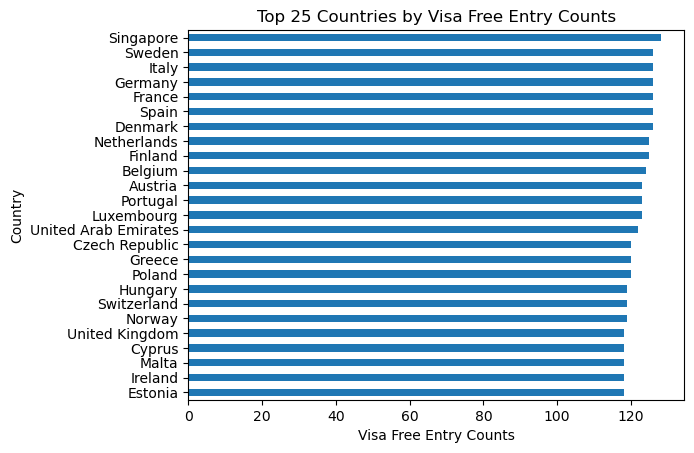

In [8]:
top25.iloc[::-1].plot(kind='barh')
plt.title('Top 25 Countries by Visa Free Entry Counts')
plt.ylabel('Country')
plt.xlabel('Visa Free Entry Counts')
# plt.style.use('default')
plt.legend().set_visible(False)
plt.show()

# Bottom 25 Visa Free Entry Countries

In [10]:
sorted_vf_bottom = visa_free_group.sort_values('requirement', ascending=True)
bottom25 =sorted_vf_bottom.head(25)
bottom25

,requirement
passport,
Afghanistan,4
Iraq,7
Syria,7
Yemen,9
North Korea,9
Pakistan,9
Somalia,9
Eritrea,10
Palestine,11


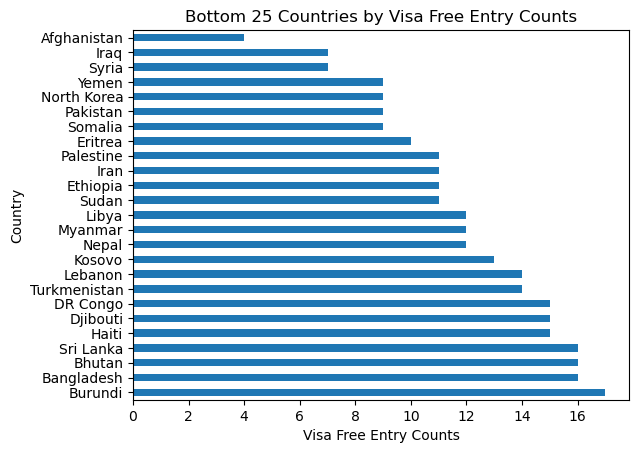

In [11]:
bottom25.iloc[::-1].plot(kind='barh')
plt.title('Bottom 25 Countries by Visa Free Entry Counts')
plt.ylabel('Country')
plt.xlabel('Visa Free Entry Counts')
plt.legend().set_visible(False)
plt.show()

## destinations with most and least visa free access

In [13]:
visa_free_d = df[df.requirement == 'Visa Free']
visa_free_d_group = visa_free_d[['destination', 'requirement']].groupby('destination').count()
sorted_vf_d = visa_free_d_group.sort_values('requirement', ascending=False)
vfd_top25 =sorted_vf_d.head(25)
vfd_top25

,requirement
destination,
Micronesia,198
Seychelles,197
Dominica,196
Haiti,193
Saint Vincent and the Grenadines,187
Barbados,179
Malaysia,165
Singapore,163
Gambia,159


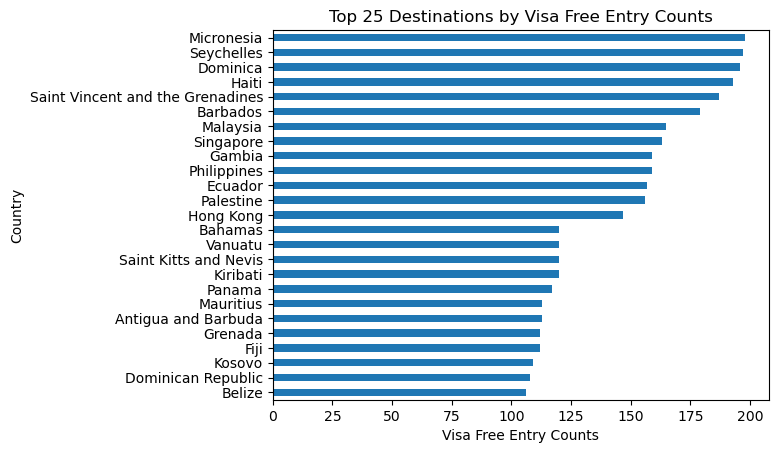

In [14]:
vfd_top25.iloc[::-1].plot(kind='barh')
plt.title('Top 25 Destinations by Visa Free Entry Counts')
plt.ylabel('Country')
plt.xlabel('Visa Free Entry Counts')
plt.legend().set_visible(False)
plt.show()

In [16]:
sorted_vf_d_bottom = visa_free_d_group.sort_values('requirement', ascending=True)
vfd_bottom25 =sorted_vf_d_bottom.head(25)
vfd_bottom25

,requirement
destination,
Iraq,1
Yemen,1
Nauru,1
Australia,1
Djibouti,1
Nepal,1
New Zealand,1
Canada,1
Libya,2


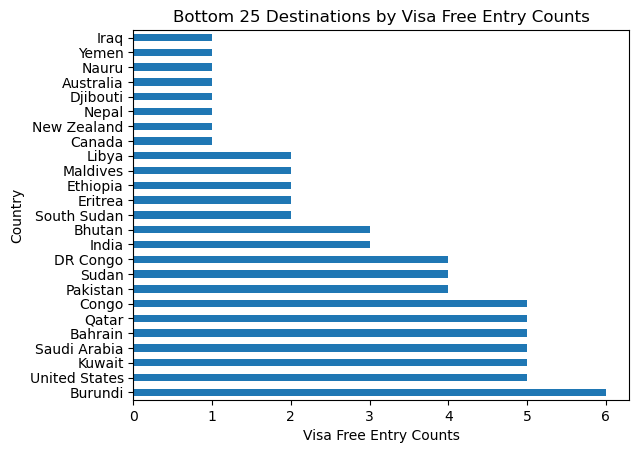

In [17]:
vfd_bottom25.iloc[::-1].plot(kind='barh')
plt.title('Bottom 25 Destinations by Visa Free Entry Counts')
plt.ylabel('Country')
plt.xlabel('Visa Free Entry Counts')
plt.legend().set_visible(False)
plt.show()

# destinations requiring most e-visas

In [19]:
top_evisa = df[df.requirement == 'e-visa']
top_evisa_group = top_evisa[['destination', 'requirement']].groupby('destination').count()
sorted_top_ev = top_evisa_group.sort_values('requirement', ascending=False)
top_ev = sorted_top_ev.head(10)
top_ev

,requirement
destination,
Australia,197
Djibouti,197
Sri Lanka,196
South Sudan,196
Bhutan,195
Equatorial Guinea,192
DR Congo,191
Cameroon,191
Pakistan,186


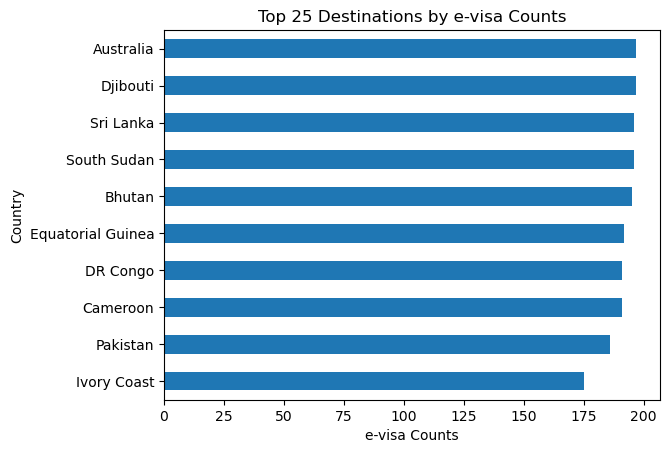

In [20]:
top_ev.iloc[::-1].plot(kind='barh')
plt.title('Top 25 Destinations by e-visa Counts')
plt.ylabel('Country')
plt.xlabel('e-visa Counts')
plt.legend().set_visible(False)
plt.show()

In [22]:
few_evisa = df[df.requirement == 'e-visa']
few_evisa_group = few_evisa[['destination', 'requirement']].groupby('destination').count()
sorted_few_ev = few_evisa_group.sort_values('requirement', ascending=True)
sorted_few_ev.head(10)

,requirement
destination,
Philippines,1
Bolivia,1
Chile,1
Togo,1
Mexico,3
Egypt,4
Japan,4
Angola,4
United Kingdom,5


In [24]:
most_no_admission = df[df.requirement == 'No Admission']
most_no_admission_group = most_no_admission[['passport', 'requirement']].groupby('passport').count()
sorted_most_no_admission = most_no_admission_group.sort_values('requirement', ascending=False)
no_admit_top = sorted_most_no_admission.head(25)
no_admit_top

,requirement
passport,
Israel,11
Kosovo,3
North Korea,2
Palestine,2
Armenia,1
Azerbaijan,1
Bangladesh,1
Haiti,1
Iran,1


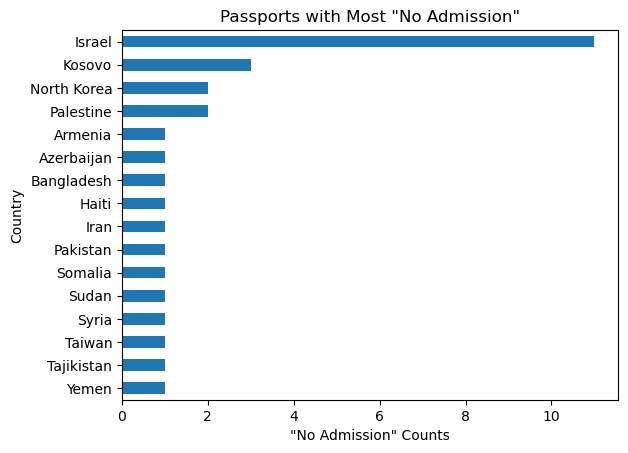

In [25]:
no_admit_top.iloc[::-1].plot(kind='barh')
plt.title('Passports with Most "No Admission"')
plt.ylabel('Country')
plt.xlabel('"No Admission" Counts')
plt.legend().set_visible(False)
plt.show()

In [27]:
on_arrival = df[df.requirement == 'Visa on Arrival']
on_arrival_group = on_arrival[['destination', 'requirement']].groupby('destination').count()
sorted_on_arrival = on_arrival_group.sort_values('requirement', ascending=False)
oa = sorted_on_arrival.head(25)
oa

,requirement
destination,
Comoros,198
Somalia,197
Madagascar,196
Maldives,196
Burundi,192
Cambodia,190
Mauritania,189
Nepal,185
Guinea-Bissau,184


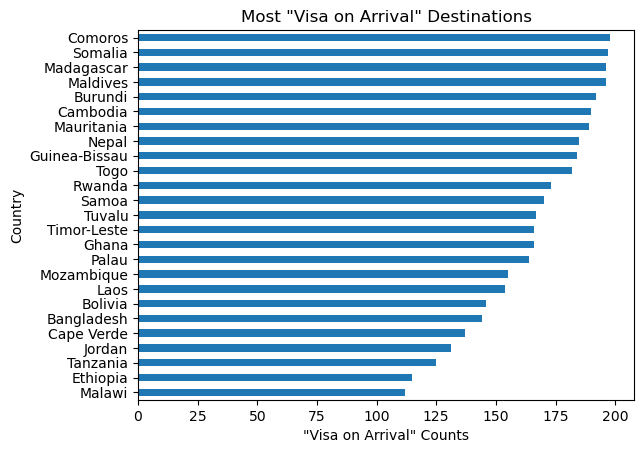

In [28]:
oa.iloc[::-1].plot(kind='barh')
plt.title('Most "Visa on Arrival" Destinations')
plt.ylabel('Country')
plt.xlabel('"Visa on Arrival" Counts')
plt.legend().set_visible(False)
plt.show()

# US visa requirements

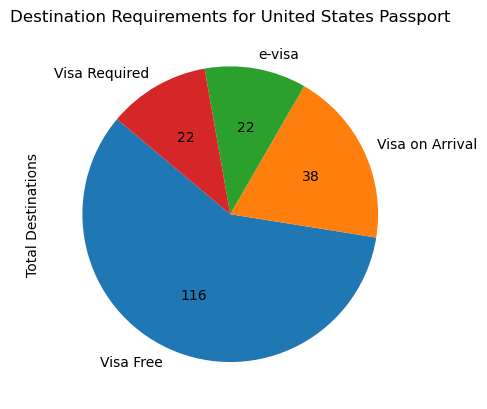

In [29]:
# value_revert function to turn pertcentages into ints
def value_revert(pct):
    value = int(round((pct/100)*us_requirements.sum(), 0))
    return value

# create pie chart
us_data = df[df.passport == 'United States']
us_requirements = us_data[us_data.destination != 'United States'].requirement.value_counts()
us_requirements.plot(kind='pie', autopct=value_revert, startangle=140)
plt.title('Destination Requirements for United States Passport')
plt.ylabel('Total Destinations')
plt.show()

## passport power index (no need for visa prior to travel)

In [31]:
entry = ["Visa Free", "Visa on Arrival"]
entry_df = df[df.requirement.isin(entry)]
power_index = entry_df.groupby('passport').size().sort_values(ascending=False)
power_index

passport
United Arab Emirates    161
Singapore               159
South Korea             157
Spain                   156
Italy                   156
                       ... 
Yemen                    32
Pakistan                 29
Syria                    27
Iraq                     27
Afghanistan              24
Length: 199, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


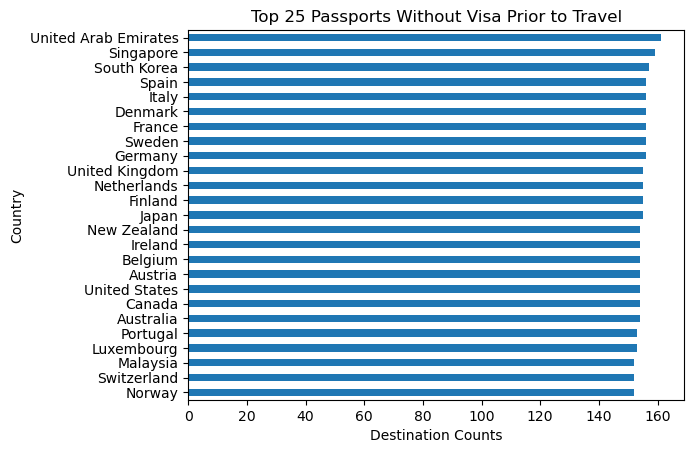

In [32]:
pi_top25 = power_index.head(25)
pi_top25.iloc[::-1].plot(kind='barh')
plt.title('Top 25 Passports Without Visa Prior to Travel')
plt.ylabel('Country')
plt.xlabel('Destination Counts')
plt.legend().set_visible(False)
plt.show()

# continent mapping

In [35]:
visa_free_region = merge_df[merge_df.requirement == 'Visa Free']
vf_region_count = visa_free_region.groupby('region').requirement.value_counts().sort_values(ascending=False)
vf_region_count

region    requirement
Europe    Visa Free      4787
Americas  Visa Free      2811
Asia      Visa Free      2344
Africa    Visa Free      1649
Oceania   Visa Free      1012
Name: count, dtype: int64

In [36]:
vf_subregion_count = visa_free_region.groupby('sub-region').requirement.value_counts().sort_values(ascending=False)
vf_subregion_count

sub-region                       requirement
Latin America and the Caribbean  Visa Free      2579
Sub-Saharan Africa               Visa Free      1521
Southern Europe                  Visa Free      1514
Northern Europe                  Visa Free      1198
Western Europe                   Visa Free      1086
Eastern Europe                   Visa Free       989
Western Asia                     Visa Free       878
Eastern Asia                     Visa Free       592
South-eastern Asia               Visa Free       590
Micronesia                       Visa Free       330
Polynesia                        Visa Free       242
Northern America                 Visa Free       232
Australia and New Zealand        Visa Free       225
Melanesia                        Visa Free       215
Southern Asia                    Visa Free       161
Northern Africa                  Visa Free       128
Central Asia                     Visa Free       123
Name: count, dtype: int64

## Work with the country boundaries json

In [50]:
boundaries_df.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,,,,,,,,,,
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,,,,,,,,,,
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,,,,,,,,,,
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,1,Vietnam,...,,,,,,,,,,
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,1,Venezuela,...,,,,,,,,,,


In [51]:
boundaries_df.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_VN', 'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR',
       'FCLASS_IT', 'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA'],
      dtype='object', length=168)

In [53]:
boundaries_clean = boundaries_df.copy()
boundaries_clean = boundaries_clean[['NAME', 'ISO_A2_EH', 'POP_EST', 'GDP_MD', 'CONTINENT', 'REGION_UN', 'SUBREGION']]

In [56]:
# merge passport df with boundaries_clean on passport_code=ISO_A2_EH
merge_df = df.merge(boundaries_clean, left_on='passport_code', right_on='ISO_A2_EH', how='left')

In [57]:
merge_df.head()

,passport,passport_code,destination,destination_code,requirement,visafree_days,NAME,ISO_A2_EH,POP_EST,GDP_MD,CONTINENT,REGION_UN,SUBREGION
0,Afghanistan,AF,Albania,AL,e-visa,NaN,Afghanistan,AF,38041754.0,19291.0,Asia,Asia,Southern Asia
1,Afghanistan,AF,Antigua and Barbuda,AG,e-visa,NaN,Afghanistan,AF,38041754.0,19291.0,Asia,Asia,Southern Asia
2,Afghanistan,AF,Australia,AU,e-visa,NaN,Afghanistan,AF,38041754.0,19291.0,Asia,Asia,Southern Asia
3,Afghanistan,AF,Bahamas,BS,e-visa,NaN,Afghanistan,AF,38041754.0,19291.0,Asia,Asia,Southern Asia
4,Afghanistan,AF,Bahrain,BH,e-visa,NaN,Afghanistan,AF,38041754.0,19291.0,Asia,Asia,Southern Asia


Now we can use the population and gdp data from passport countries if yall are interested :)

In [58]:
visa_free_region = merge_df[merge_df.requirement == 'Visa Free']
vf_continent_count = visa_free_region.groupby('CONTINENT').requirement.value_counts().sort_values(ascending=False)
vf_continent_count

CONTINENT                requirement
Europe                   Visa Free      4800
Asia                     Visa Free      2403
North America            Visa Free      1896
Africa                   Visa Free      1413
Oceania                  Visa Free      1123
South America            Visa Free       915
Seven seas (open ocean)  Visa Free       246
Name: count, dtype: int64

In [64]:
no_prior_region = merge_df[merge_df.requirement.isin(['Visa Free', 'Visa on Arrival'])]
npv_continent_count = no_prior_region.groupby('CONTINENT').CONTINENT.value_counts().sort_values(ascending=False)
npv_continent_count

CONTINENT
Europe                     6254
Asia                       3957
Africa                     2711
North America              2599
Oceania                    1615
South America              1323
Seven seas (open ocean)     334
Name: count, dtype: int64

In [59]:
vf_region_count = visa_free_region.groupby('REGION_UN').requirement.value_counts().sort_values(ascending=False)
vf_region_count

REGION_UN  requirement
Europe     Visa Free      4800
Americas   Visa Free      2811
Asia       Visa Free      2344
Africa     Visa Free      1718
Oceania    Visa Free      1123
Name: count, dtype: int64

In [65]:
npv_region_count = no_prior_region.groupby('REGION_UN').REGION_UN.value_counts().sort_values(ascending=False)
npv_region_count

REGION_UN
Europe      6254
Americas    3922
Asia        3885
Africa      3117
Oceania     1615
Name: count, dtype: int64

In [60]:
vf_subregion_count = visa_free_region.groupby('SUBREGION').requirement.value_counts().sort_values(ascending=False)
vf_subregion_count

SUBREGION                  requirement
Southern Europe            Visa Free      1527
Northern Europe            Visa Free      1198
Western Europe             Visa Free      1086
Caribbean                  Visa Free      1015
Eastern Europe             Visa Free       989
South America              Visa Free       915
Western Asia               Visa Free       878
Central America            Visa Free       649
Eastern Africa             Visa Free       602
Eastern Asia               Visa Free       592
South-Eastern Asia         Visa Free       590
Western Africa             Visa Free       491
Australia and New Zealand  Visa Free       336
Micronesia                 Visa Free       330
Polynesia                  Visa Free       242
Northern America           Visa Free       232
Melanesia                  Visa Free       215
Southern Africa            Visa Free       200
Middle Africa              Visa Free       186
Southern Asia              Visa Free       161
Northern Africa      

In [ ]:
npv_subregion_count = no_prior_region.groupby('SUBREGION').SUBREGION.value_counts().sort_values(ascending=False)
npv_subregion_count